In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("/content/Advertising.csv")

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

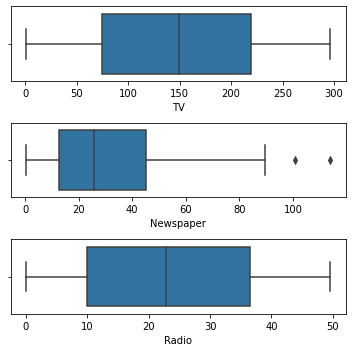

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

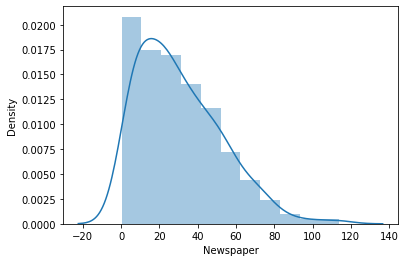

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

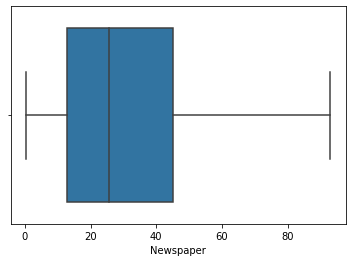

In [ ]:
sns.boxplot(data['Newspaper'])

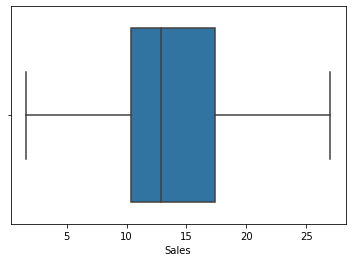

In [ ]:
sns.boxplot(data['Sales']);

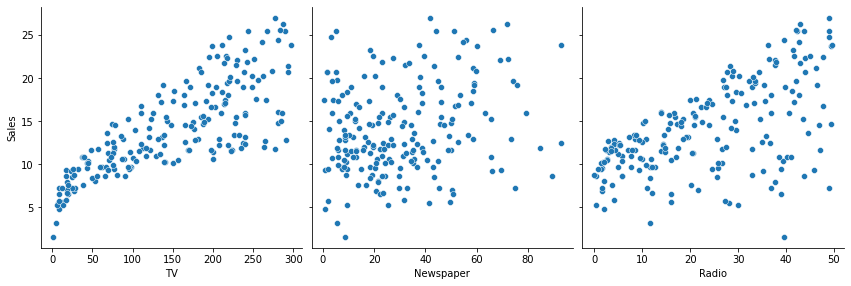

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

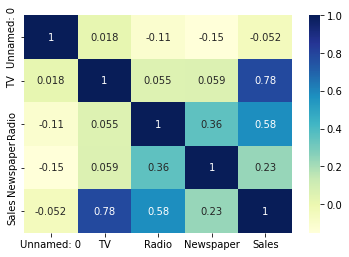

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
X = data['TV']
y = data['Sales']

In [ ]:
X = X.values.reshape(-1,1)

In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [ ]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)

In [ ]:
knn_test_pred = knn.predict(X_train)

In [ ]:
print(knn_train_pred, knn_test_pred)

[ 9.96 11.72 14.74 12.66  8.4  12.78 11.72 20.78 17.28 14.06  6.7  16.98
 12.6  18.34 18.72 13.34 12.38 16.52 11.3  11.72 15.9  18.72  6.2  12.82
  8.4  19.86 14.74  7.54 21.4  19.68 17.28 19.12 10.2  11.1  20.78 15.64
 11.72 12.3  15.64  9.92 15.82  4.64 18.34 19.64  9.98  8.32 15.36 21.6
  5.78  6.2  11.1  18.9  17.28 17.4   9.58 12.66  9.9   7.94  4.64 17.28
 15.82 16.38 15.9  18.92  5.78 18.72 21.6  14.34 10.02 19.44 12.7  11.6
 18.34  8.32  9.96 19.86 11.72 18.3  10.18 12.44 18.9   9.54 11.1  18.36
 18.2  10.44 10.44 21.4  18.72 19.46 15.94 17.52  9.66 14.06 12.38 12.66
  9.98 18.44 18.9  14.34 14.34 18.92 20.54 12.38 18.9  18.9  20.8  18.72
  7.94 10.44 21.6  13.9  19.12 12.64  9.66  8.32 19.22 20.54 12.38 10.18
  7.16 14.5  12.7  14.06 19.68 14.74 11.46 14.74 16.38  9.96 12.3   7.16
 15.64 14.74] [ 9.96 11.72 14.74 12.66  8.4  12.78 11.72 20.78 17.28 14.06  6.7  16.98
 12.6  18.34 18.72 13.34 12.38 16.52 11.3  11.72 15.9  18.72  6.2  12.82
  8.4  19.86 14.74  7.54 21.4  19.68 17

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [ ]:
print(svr_train_pred,svr_test_pred)

[10.01843553 10.32262116 13.56215443 13.13275474  8.4246198  12.00019759
 10.45596241 18.80019763 16.23604284 12.66861477  7.90385041 17.85187006
 17.68140097 18.43393532 17.90909637 12.91231812 12.17247902 18.10073079
 10.63255812 10.46053053 15.40015683 17.25690279  7.83844604 12.95504961
  8.31996264 18.53500203 13.6418719   8.04057892 19.17807051 17.08356333
 16.27780137 19.21191329 10.11740802 11.22673178 18.86812622 14.95278871
 10.40098708 13.08466557 14.95278871  9.38123678 17.5941335   7.78835354
 18.35019772 17.37653702 11.36423928  8.20045704 17.77799377 18.99443459
  7.82314196  7.88024532 11.3019689  19.1529269  16.27780137 18.21645275
  9.67129477 13.17674731  9.80003212  8.25869045  7.7984799  16.2241149
 17.5941335  15.60319641 15.40015683 18.45970559  7.83493855 17.89356299
 18.91790527 14.5821854   8.74554749 19.24533681 11.87600677 10.98868887
 18.38584444  8.21951973 10.06092232 18.59536385 10.41016968 19.22254601
 11.4959113  12.12435573 19.14970617  9.57117399 11.

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5784281059035146
RMSE: 3.257599073892714


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,Support Vector Machine,0.602656,0.578428,3.257599,0.024228


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_constant = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(y_train, X_train_constant).fit()

In [ ]:
model.params

const    6.724322
x1       0.048308
dtype: float64

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     213.6
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.28e-29
Time:                        17:06:23   Log-Likelihood:                -348.98
No. Observations:                 134   AIC:                             702.0
Df Residuals:                     132   BIC:                             707.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7243      0.575     11.689      0.0

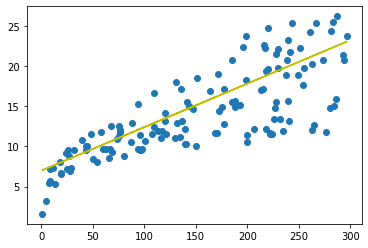

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()